Problem Statement -
Build your own recommendation system for products on an e-commerce website like Amazon.com.


Dataset - ​ Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/) ratings_Electronics_Ver3.tar.xzView in a new window (you may use winrar application to extract the .csv file)

Dataset columns - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it.


o The repository has several datasets. For this case study, please use the Electronics dataset.
o The host page has several pointers to scripts and other examples that can help with parsing the datasets.
o The data set consists of:
● 7,824,482 Ratings (1-5) for Electronics products.
● Other metadata about products. Please see the description of the fields available on the web page cited above.


o For convenience of future use, parse the raw data file (using Python, for example) and extract the following fields: 'product/productId' as prod_id, 'product/title' as prod_name, 'review/userId' as user id, 'review/score' as rating
o Save these to a tab separated file. Name this file as product_ratings.csv.

Steps -
1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )
3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)
4. Build Popularity Recommender model.
5. Build Collaborative Filtering model.
6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)
7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.
8. Summarise your insights.

Mark Distributions -
Step - 1,2,3,8 - 5 marks each
Step - 4,5,6,7 - 10 marks each

Please note: Since going forward, you will be pushing all your assessment files to the same repository for the remainder of the program, so it is important that you follow some name structure to identify your assessment submission properly.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### 1. Read and explore the dataset. (Rename column, plot histograms, find data characteristics)

In [3]:
col_names = ['userid', 'productid', 'rating', 'timestamp']
df = pd.read_csv('ratings_Electronics.csv', names = col_names)

In [4]:
df.shape

(7824482, 4)

In [5]:
df.drop(['timestamp'], axis=1, inplace = True)

In [6]:
df.head()

,userid,productid,rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [7]:
print ('**********Describe**********************')
df.describe(include = 'all').transpose()

print ('**********Info**********************')
df.info()



print ('**********Is NA Count**********************')
df.isna().sum()


print ('**********Is Null**********************')

df.isnull().any(axis=0)

**********Describe**********************


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
userid,7824482,4201696,A5JLAU2ARJ0BO,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
productid,7824482,476002,B0074BW614,18244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,7.82448e+06,NaN,NaN,NaN,4.01234,1.38091,1,3,5,5,5


**********Info**********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 3 columns):
userid       object
productid    object
rating       float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB
**********Is NA Count**********************


userid       0
productid    0
rating       0
dtype: int64

**********Is Null**********************


userid       False
productid    False
rating       False
dtype: bool

### About Data
#### First two columns are object type and the last column rating is numerical with mean rating of ~4. No null values in the dataframe.
#### 7,824,482 total records
#### 476,002 unique products
#### 4,201,696 unique users


In [ ]:
# pd.crosstab(df['rating'], df['productid'] )

(array([ 901765.,       0.,  456322.,       0.,       0.,  633073.,
              0., 1485781.,       0., 4347541.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

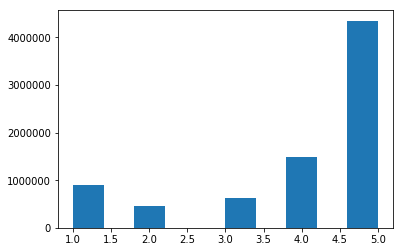

In [8]:
plt.hist(df['rating'])
plt.show()

### rating 5 has highest frequency

### Unable to generate Histograms for Userid and productid because of huge amount of data. Have alreay tried several times now for several hours each.

In [9]:

#plt.hist(df['userid'])
#plt.show()

In [ ]:
#plt.hist(df['productid'])
#plt.show()

### 2. Take subset of dataset to make it less sparse/more dense. (For example, keep the users only who has given 50 or more number of ratings )

In [19]:
#finding products that were rated more than once. This helps in eliminating the non-popular products (having only 1 rating)
prod_count = df["productid"].value_counts(ascending=False)
pop_product = prod_count.loc[prod_count.values >1].index
len(pop_product)

296264

In [20]:
#finding the popular users, who gave more than 50 ratings
user_count = df["userid"].value_counts(ascending=False)
pop_user = user_count.loc[user_count.values > 50].index
len(pop_user)

1466

### create a dataframe with products having more than 1 rating and users who provided more than 50 ratings

In [22]:
df_popular= df[df.userid.isin(pop_user) & df.productid.isin(pop_product) ]
df_popular.shape

(119304, 3)

In [23]:
df_popular_user= df[df.userid.isin(pop_user)]
df_popular_user.shape

(122171, 3)

### create a dataframe of users who gave more than 50 ratings

In [10]:
s_user = df['userid'].value_counts()

In [11]:
type (s_user)

pandas.core.series.Series

In [12]:
s_user.head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userid, dtype: int64

In [13]:
df_user = pd.Series.to_frame(s_user)

In [14]:
type(df_user)

pandas.core.frame.DataFrame

In [15]:
df_user.shape

(4201696, 1)

In [16]:
df_user['rating_count'] = df_user['userid'] 
df_user['userid'] = list(df_user.index)

In [17]:
df_user.head()

,userid,rating_count
A5JLAU2ARJ0BO,A5JLAU2ARJ0BO,520
ADLVFFE4VBT8,ADLVFFE4VBT8,501
A3OXHLG6DIBRW8,A3OXHLG6DIBRW8,498
A6FIAB28IS79,A6FIAB28IS79,431
A680RUE1FDO8B,A680RUE1FDO8B,406


### Create a dataframe containing userid, productid, rating, rating_count (number of ratings of that user)

In [43]:
df_ratingcount = pd.merge(df, df_user, on='userid')

In [44]:
df_ratingcount.head()

,userid,productid,rating,rating_count
0,AKM1MP6P0OYPR,0132793040,5.0,2
1,AKM1MP6P0OYPR,B005UEB5TQ,5.0,2
2,A2CX7LUOHB2NDG,0321732944,5.0,4
3,A2CX7LUOHB2NDG,B000W3LJ6Y,5.0,4
4,A2CX7LUOHB2NDG,B001EYU79A,5.0,4


### dataframe containing more than 50 ratings per user

In [45]:
df_rating50 = df_ratingcount[df_ratingcount['rating_count']>=50]

In [47]:
df_rating50.shape

(125871, 4)

### 3. Split the data randomly into train and test dataset. (For example split it in 70/30 ratio)

In [125]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df_rating50, test_size = 0.30, random_state=0)

print ('train', train_data.shape)
print ('test', test_data.shape)

train (88109, 4)
test (37762, 4)


### data_for_colab is being taken as a subset as I am getting memory error in collaboration model

In [126]:
data_for_colab, data_onhold = train_test_split(df_rating50, train_size = 0.10, random_state=0)

C:\Users\ashutosh.c.agarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


### 4. Build Popularity Recommender model.

### Popularty based model assumes mean rating to be a measure of popularity

In [76]:
# Create a function to accept the dataframe and calculate the 10 popular products based on mean ratings

def Recommender_Popularity(data):
    ## create a dataframe with two columns - product and ratings
    df_prod_rating = data.drop(columns=['userid', 'rating_count'], axis=0)

    ## generate a df with product and mean rating
    df_prod_meanrating = pd.pivot_table(df_prod_rating, values='rating',  index=['productid'], aggfunc='mean')  

    ## Sort and print top 10 products based on mean rating
    print(df_prod_meanrating.sort_values(by='rating', ascending=False).head(10))


In [79]:
Recommender_Popularity(train_data)

            rating
productid         
0594451647     5.0
B003TOE4PQ     5.0
B003TSDWUA     5.0
B003TSCZS0     5.0
B003TROEBM     5.0
B003TR1OEC     5.0
B003TQN2VG     5.0
B003TPUS3W     5.0
B003TP39QA     5.0
B003TP2PU6     5.0


In [80]:
Recommender_Popularity(test_data)

            rating
productid         
B003E2YAU2     5.0
B003Y3TS4Y     5.0
B003Y5FRNS     5.0
B003Y5H17I     5.0
B003Y5N8RU     5.0
B003Y5YMQ6     5.0
B003Y60E3K     5.0
B003Y81K4K     5.0
B003Y8AZ8W     5.0
B003Y8DIRC     5.0


### 5. Build Collaborative Filtering model.

In [127]:
from surprise import Dataset,Reader
reader = Reader(rating_scale=(1, 5))

### using data_for_colab (subset of larger database to avoid memory error)

In [128]:
data = Dataset.load_from_df(data_for_colab[['userid', 'productid', 'rating']], reader)

In [129]:
data

In [130]:
data.df.head

<bound method NDFrame.head of                  userid   productid  rating
373278   A16CVJUQOB6GIB  B004MNAFWY     3.0
984423    ASRA2UZ3JV87B  B000NEDYU6     3.0
2127097  A1HBI9BBQIG1NH  B006I5MKZY     3.0
311048   A3LPL35P7FH78Y  B002FRLEIS     4.0
669043   A2X78O6G89CB30  B003YH9DZ4     4.0
43898      A6FIAB28IS79  B0031KBKLY     5.0
119379   A2RWHTNM5P3I8Y  B004P8K24W     3.0
629802   A2BX8DDQGCCG2J  B00372YKMM     5.0
750793   A240FRPD4MEXND  B0042X93AY     4.0
123535   A2CL818RN52NWN  B0000E6S0X     5.0
1431185   AP53MVRC8ZEW2  B005484N9W     4.0
848287   A257X1MQJO82P2  B001KBZ3P0     5.0
336675    AWH2AY17ZU7W2  B004XNLR16     5.0
8010     A18S2VGUH9SCV5  B005CLPP84     5.0
420623   A2NXRD80LWHUOP  B000A3JDBE     4.0
467702   A10ZFE6YE0UHW8  B00ADG5FLK     4.0
161525    AMKNPIDFLRFMP  B00006OXGH     4.0
287454   A3EFSLEMHNPP6A  B00ISRUFSY     4.0
1025418  A28BX3MM90A6FI  B000EDNYTW     4.0
669826    A8P6GIIQ6YQV8  B00IEYG88M     5.0
575268    AQM0K7MBBT4AY  B00E3W15P0     5.0
22

In [132]:
# Split data to train and test
from surprise.model_selection import train_test_split

#  
trainset, testset = train_test_split(data, test_size=.3,random_state=123)

# to build on full data
#trainset = data.build_full_trainset()

In [133]:
type(trainset)

surprise.trainset.Trainset

In [134]:
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Prediction

In [135]:
algo = KNNWithMeans(k=51, sim_options={'name': 'pearson', 'user_based': False})

In [136]:
algo.fit(trainset)

Computing the pearson similarity matrix...
Done computing similarity matrix.


### 6. Evaluate both the models. (Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

In [137]:
### Evaluating Collaboration Model

# Evalute on test set
test_pred = algo.test(testset)

# compute RMSE
accuracy.rmse(test_pred)

RMSE: 1.1686


1.1686128150676913

In [138]:
### Evaluating Popularity Model
Recommender_Popularity(test_data)

            rating
productid         
B003E2YAU2     5.0
B003Y3TS4Y     5.0
B003Y5FRNS     5.0
B003Y5H17I     5.0
B003Y5N8RU     5.0
B003Y5YMQ6     5.0
B003Y60E3K     5.0
B003Y81K4K     5.0
B003Y8AZ8W     5.0
B003Y8DIRC     5.0


#### Popularity Model is dependent only on the top mean ratings and not based on user.

### 7. Get top - K (K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits,we will recommend 5 new products.

In [139]:
test_pred_df = pd.DataFrame([[x.uid,x.iid,x.est] for x in test_pred])

In [140]:
test_pred_df.head()

,0,1,2
0,A2KYRPDKVBI2R4,B007KXI2R8,4.262202
1,A35A2RWUMC737N,B007W66BRG,4.262202
2,ABDR6IJ93HFIO,B004G6002M,5.000000
3,A2M9ME0N2S3R39,B0002MQGRC,4.262202
4,A3A4ZAIBQWKOZS,B0002GV876,4.262202


In [141]:
test_pred_df.columns = ["userId","productid","est_rating"]
test_pred_df.sort_values(by = ["userId", "est_rating"],ascending=False,inplace=True)

In [142]:
test_pred_df.head()

,userId,productid,est_rating
900,AZNUHQSHZHSUE,B002LARYGA,5.000000
144,AZNUHQSHZHSUE,B009M3PP7O,4.262202
159,AZNUHQSHZHSUE,B002M3SO1U,4.262202
2435,AZMY6E8B52L2T,B007PX7QES,4.262202
3397,AZMY6E8B52L2T,B001M56DI0,4.262202


In [143]:
top_5_recos = test_pred_df.groupby("userId").head(5).reset_index(drop=True)

In [145]:
top_5_recos.head()

,userId,productid,est_rating
0,AZNUHQSHZHSUE,B002LARYGA,5.000000
1,AZNUHQSHZHSUE,B009M3PP7O,4.262202
2,AZNUHQSHZHSUE,B002M3SO1U,4.262202
3,AZMY6E8B52L2T,B007PX7QES,4.262202
4,AZMY6E8B52L2T,B001M56DI0,4.262202


### 8. Summarise your insights.

### Popularity based recommendations are not personalized. They are common for all users. Popularity can be derived based on different parameters. Here we assumed it to be mean ratings. In another case, if rating is not provided, we can even consider, count of users buying a particular product as its popularity ranking. It depends upon the business context and data availability. However, key point here is, its not largely personalized. Some amount of personalization can be done eg. based on geography etc.

### Collaborative filtering recommendation used similarity of different users based on thier preferences. eg. users providng similar rating to a product are more likely to have similar preference for other products. this is highly personalized.
### Between KNNWithMeans and SVD Recommendation models, SVD is faster in generating the results. KNNWithMeans is quite expensive in terms of system resource utilization and also time consuming